In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Load Dataset

In [ ]:
df_raw.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."


## Quick Glance of Data

In [ ]:
df_raw.shape

(143190, 16)

In [ ]:
!pip install sweetviz
import sweetviz as sv
advert_report = sv.analyze(df_raw)
advert_report.show_html('Ouput.html')

In [ ]:
df_raw[df_raw.comments_disabled==True][['likes','dislikes']].sum()

likes       121808190
dislikes      6939698
dtype: int64

In [ ]:
df_raw[df_raw.comments_disabled==True].comment_count.sum()

0

In [ ]:
df_raw.groupby(by='comments_disabled').size()

comments_disabled
False    140985
True       2205
dtype: int64

In [ ]:
df_raw.groupby(by='trending_date').size()

trending_date
2020-08-12T00:00:00Z    200
2020-08-13T00:00:00Z    200
2020-08-14T00:00:00Z    200
2020-08-15T00:00:00Z    200
2020-08-16T00:00:00Z    200
                       ... 
2022-07-20T00:00:00Z    200
2022-07-21T00:00:00Z    200
2022-07-22T00:00:00Z    200
2022-07-23T00:00:00Z    200
2022-07-24T00:00:00Z    200
Length: 696, dtype: int64

In [ ]:
df_raw.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,143190.000000,1.431900e+05,1.431900e+05,143190.000000,1.431900e+05
mean,18.847070,2.627830e+06,1.403175e+05,2129.192297,1.161499e+04
std,6.777946,6.843052e+06,4.035922e+05,10929.008548,8.288976e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,5.059715e+05,2.035100e+04,0.000000,1.426000e+03
50%,20.000000,1.036562e+06,4.792650e+04,402.000000,3.259000e+03
75%,24.000000,2.338864e+06,1.207615e+05,1382.000000,7.860000e+03
max,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06


In [ ]:
df_raw.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

## Data Pre-processing & Cleaning

In [ ]:
df = df_raw.copy(deep=True)

In [ ]:
df.publishedAt = pd.to_datetime(df.publishedAt)
df.trending_date = pd.to_datetime(df.trending_date)

df['year'] = df['publishedAt'].dt.year
df['month'] = df['publishedAt'].dt.month
df.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,year,month
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020,8
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",2020,8


In [ ]:
# check
df.dtypes

video_id                          object
title                             object
publishedAt          datetime64[ns, UTC]
channelId                         object
channelTitle                      object
categoryId                         int64
trending_date        datetime64[ns, UTC]
tags                              object
view_count                         int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
description                       object
year                               int64
month                              int64
dtype: object

In [ ]:
# Read category json file
f = open('/content/drive/Shareddrives/551project/Youtube_2022/US_category_id.json')
category_f = json.load(f)

In [ ]:
# Create a dictionary which contains category id and name
temp_dict = category_f['items']
category_dict = {}
for i, key in enumerate(temp_dict):
  category_dict[int(temp_dict[i]['id'])] = temp_dict[i]['snippet']['title']

In [ ]:
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [ ]:
# Create a category name column 
df['category_name'] = ''
for i,j in df.iterrows():
  df['category_name'][i] = category_dict[df['categoryId'][i]]

In [ ]:
df.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,year,month,category_name
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020,8,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",2020,8,Gaming


In [ ]:
# Drop useless rows and columns 
df = df[df.ratings_disabled == False]
df = df.drop(['thumbnail_link','ratings_disabled'], axis=1)

In [ ]:
df.isna().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
comments_disabled       0
description          3615
year                    0
month                   0
category_name           0
dtype: int64

In [ ]:
df.description = df.description.fillna('No Description')

In [ ]:
df.head(1)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,description,year,month,category_name
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020,8,People & Blogs


## Exploratory Data Analysis (EDA)

In [ ]:
# Top 10 channels
channels_2020 = df[df['year']==2020]
channels_2020 = channels_2020.groupby(['channelTitle'])['channelTitle'].agg('count').to_frame().rename(columns={'channelTitle':'total'})
channels_2020 = channels_2020.sort_values(by='total', ascending=False)

channels_2021 = df[df['year']==2021] 
channels_2021 = channels_2021.groupby(['channelTitle'])['channelTitle'].agg('count').to_frame().rename(columns={'channelTitle':'total'})
channels_2021 = channels_2021.sort_values(by='total', ascending=False)

channels_2022 = df[df['year']==2022] 
channels_2022 = channels_2022.groupby(['channelTitle'])['channelTitle'].agg('count').to_frame().rename(columns={'channelTitle':'total'})
channels_2022 = channels_2022.sort_values(by='total', ascending=False)

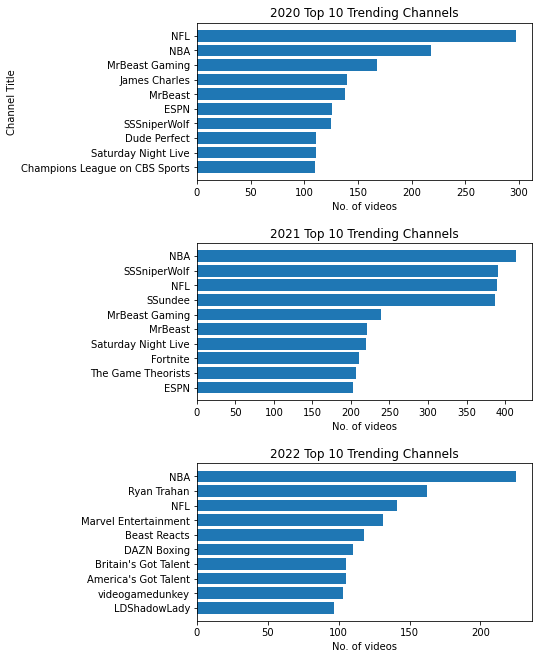

In [ ]:
plt.figure(figsize=(6,11))
plt.subplot(3,1,1)
plt.barh(channels_2020.index[:10],channels_2020.total[:10])
plt.gca().invert_yaxis()
plt.xlabel("No. of videos")
plt.ylabel("Channel Title")
plt.title("2020 Top 10 Trending Channels")
plt.subplot(3,1,2)
plt.barh(channels_2021.index[:10],channels_2021.total[:10])
plt.gca().invert_yaxis()
plt.xlabel("No. of videos")
plt.title("2021 Top 10 Trending Channels")
plt.subplot(3,1,3)
plt.barh(channels_2022.index[:10],channels_2022.total[:10])
plt.gca().invert_yaxis()
plt.xlabel("No. of videos")
plt.title("2022 Top 10 Trending Channels")
plt.subplots_adjust(hspace=0.4)
plt.show()

In [ ]:
cat_2020 = df[df['year']==2020]
cat_2020 = cat_2020.groupby(['category_name'])['category_name'].agg('count').to_frame().rename(columns={'category_name':'total'})
cat_2020 = cat_2020.sort_values(by='total', ascending=False)

cat_2021 = df[df['year']==2021] 
cat_2021 = cat_2021.groupby(['category_name'])['category_name'].agg('count').to_frame().rename(columns={'category_name':'total'})
cat_2021 = cat_2021.sort_values(by='total', ascending=False)

cat_2022 = df[df['year']==2022] 
cat_2022 = cat_2022.groupby(['category_name'])['category_name'].agg('count').to_frame().rename(columns={'category_name':'total'})
cat_2022 = cat_2022.sort_values(by='total', ascending=False)

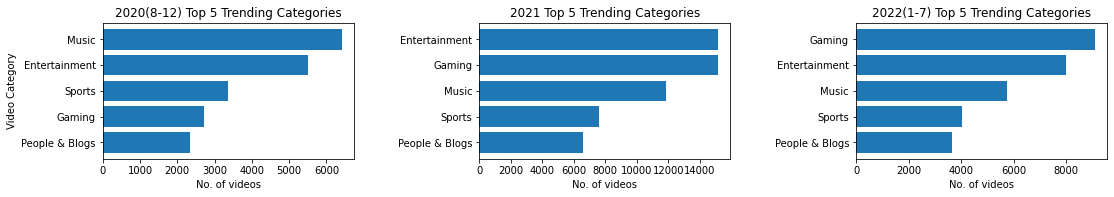

In [ ]:
plt.figure(figsize=(18,2.5))
plt.subplot(1,3,1)
plt.barh(cat_2020.index[:5],cat_2020.total[:5])
plt.gca().invert_yaxis()
plt.xlabel("No. of videos")
plt.ylabel("Video Category")
plt.title("2020(8-12) Top 5 Trending Categories")
plt.subplot(1,3,2)
plt.barh(cat_2021.index[:5],cat_2021.total[:5])
plt.gca().invert_yaxis()
plt.xlabel("No. of videos")
plt.title("2021 Top 5 Trending Categories")
plt.subplot(1,3,3)
plt.barh(cat_2022.index[:5],cat_2022.total[:5])
plt.gca().invert_yaxis()
plt.xlabel("No. of videos")
plt.title("2022(1-7) Top 5 Trending Categories")
plt.subplots_adjust(wspace=0.5)
plt.show()

## Feature Engineering

In [ ]:
df_fe = df.copy(deep=True)

In [ ]:
tmp = df_fe.loc[df_fe.groupby('video_id').trending_date.idxmin(),['video_id','trending_date']]
df_fe = df_fe.merge(tmp, on='video_id', how='left')

In [ ]:
from datetime import timedelta

Create 'To_be_trend_hours' feature

In [ ]:
df_fe = df_fe.rename(columns={'trending_date_y':'first_trending_date'})
df_fe['to_be_trend'] = df_fe['first_trending_date']-df_fe['publishedAt'] + timedelta(days=1)
df_fe['to_be_trend_hours'] = round(df_fe['to_be_trend'].dt.total_seconds()/3600,2)
df_fe['hours_of_published'] = round((df_fe['trending_date_x']-df_fe['publishedAt']).dt.total_seconds()/3600,2)
df_fe.head(3)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date_x,tags,view_count,likes,...,comment_count,comments_disabled,description,year,month,category_name,first_trending_date,to_be_trend,to_be_trend_hours,hours_of_published
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,...,35313,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020,8,People & Blogs,2020-08-12 00:00:00+00:00,1 days 04:39:46,28.66,4.66
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,...,16549,False,"While running her own modding shop, Ramya Pare...",2020,8,Gaming,2020-08-12 00:00:00+00:00,1 days 06:59:50,31.00,7.00
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,...,40221,False,I left youtube for a month and this is what ha...,2020,8,Entertainment,2020-08-12 00:00:00+00:00,1 days 07:25:54,31.43,7.43


In [ ]:
df_fe = df_fe[df_fe.video_id!='#NAME?']

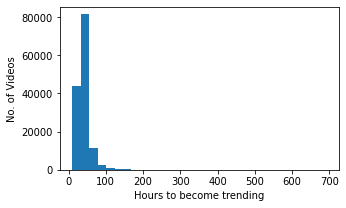

In [ ]:
# Creating histogram
fig, axs = plt.subplots(1,1,figsize =(5, 3))
axs.hist(df_fe.to_be_trend_hours, bins = 30)
plt.xlabel('Hours to become trending')
plt.ylabel('No. of Videos')
# Show plot
plt.show()

In [ ]:
df_fe.describe()

,categoryId,view_count,likes,dislikes,comment_count,year,month,to_be_trend,to_be_trend_hours,hours_of_published
count,140644.000000,1.406440e+05,1.406440e+05,140644.000000,1.406440e+05,140644.000000,140644.000000,140644,140644.000000,140644.000000
mean,18.840356,2.626862e+06,1.415421e+05,2153.227724,1.170308e+04,2021.081198,6.472356,1 days 19:15:42.812050283,43.262471,81.127097
std,6.780104,6.863514e+06,4.062682e+05,11021.799881,8.361019e+04,0.689642,3.449217,0 days 21:22:28.259185927,21.374488,57.047051
min,1.000000,0.000000e+00,1.700000e+01,0.000000,0.000000e+00,2020.000000,1.000000,0 days 09:59:50,10.000000,-14.000000
25%,17.000000,5.074288e+05,2.082700e+04,0.000000,1.438000e+03,2021.000000,4.000000,1 days 07:58:52,31.980000,42.000000
50%,20.000000,1.039831e+06,4.849500e+04,409.000000,3.273000e+03,2021.000000,6.000000,1 days 16:55:17,40.920000,77.000000
75%,24.000000,2.341888e+06,1.219418e+05,1403.000000,7.889000e+03,2022.000000,10.000000,2 days 02:59:59,51.000000,111.000000
max,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06,2022.000000,12.000000,28 days 18:37:08,690.620000,866.890000


Note: 75% trending videos get on the trending page in around 2 days, which means if they cannot become trending in 5 days, it would be hard for them to be trend later.

In [ ]:
df_fe_1 = df_fe.loc[df_fe.groupby('video_id').trending_date_x.idxmax()]
df_fe_1.shape

(25803, 21)

In [ ]:
df_fe_1['title_length'] = df_fe_1['title'].str.len()
df_fe_1['Num_words_title'] = df_fe_1['title'].str.split().apply(len)
df_fe_1.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date_x,tags,view_count,likes,...,description,year,month,category_name,first_trending_date,to_be_trend,to_be_trend_hours,hours_of_published,title_length,Num_words_title
62082,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-15 00:00:00+00:00,Migos|Avalanche|Quality|Control|Music/Motown|R...,6553613,258885,...,Watch the the official video for Migos - Avala...,2021,6,Music,2021-06-11 00:00:00+00:00,1 days 08:00:00,32.00,104.00,34,5
116180,--2O86Z0hsM,MY TESLA PAYS FOR ITSELF,2022-03-09 23:19:08+00:00,UCXJEvxZSozjAAqhbMfhIArA,jf.okay,24,2022-03-15 00:00:00+00:00,[None],538485,17290,...,No Description,2022,3,Entertainment,2022-03-11 00:00:00+00:00,2 days 00:40:52,48.68,120.68,24,5


Note: 'title_length" and "number of word in title" features are created

In [ ]:
def getDaytime(x):
    if x.hour>4 and x.hour<=10:
        return 'Morning'
    elif x.hour>10 and x.hour<=16:
        return 'Afternoon'
    elif x.hour>16 and x.hour<=22:
        return 'Evening'
    else:
        return 'Night'

df_fe_1["daytime"]=df_fe_1.publishedAt.apply(lambda x: getDaytime(x))

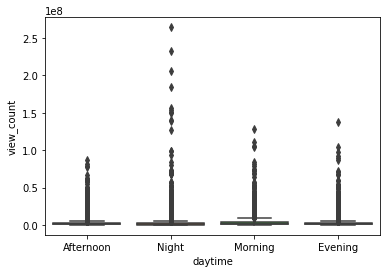

In [ ]:
sns.boxplot(x="daytime", y="view_count",data=df_fe_1)

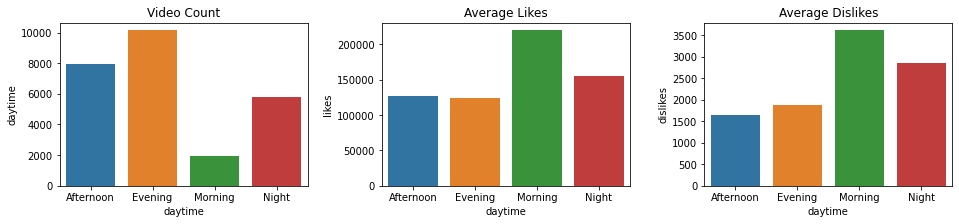

In [ ]:
#Checking Video counts and Avg likes by plotting them
tmp = df_fe_1.groupby('daytime').agg({'daytime':'count','likes':'mean','dislikes':'mean'})
plt.figure(figsize=(16,3))
plt.subplot(1,3,1)
plt.title ("Video Count")
sns.barplot(x=tmp.index, y= 'daytime', data=tmp)
plt.subplot(1,3,2)
plt.title ("Average Likes")
sns.barplot(x=tmp.index, y= 'likes', data=tmp)
plt.subplot(1,3,3)
plt.title ("Average Dislikes")
sns.barplot(x=tmp.index, y= 'dislikes', data=tmp)
plt.subplots_adjust(wspace=0.3)
plt.show()

In [ ]:
df_fe_1['pop_daytime'] = np.where(df_fe_1['daytime'].isin(['Morning','Night']),1,0)

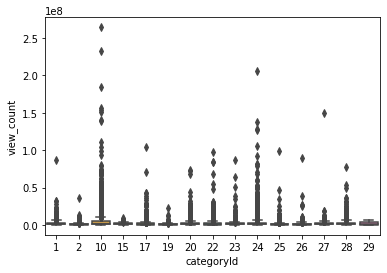

In [ ]:
sns.boxplot(x="categoryId", y="view_count",data=df_fe_1)

In [ ]:
df_fe_1['pop_category'] = np.where(df_fe_1['categoryId'].isin([10,24]),1,0)
df_fe_1['trend_in_20'] = np.where(df_fe_1['to_be_trend_hours']<=30,1,0)

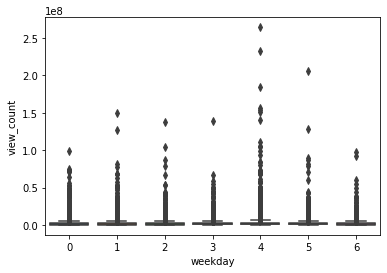

In [ ]:
df_fe_1['weekday'] = df_fe_1.publishedAt.dt.dayofweek
sns.boxplot(x="weekday", y="view_count",data=df_fe_1)

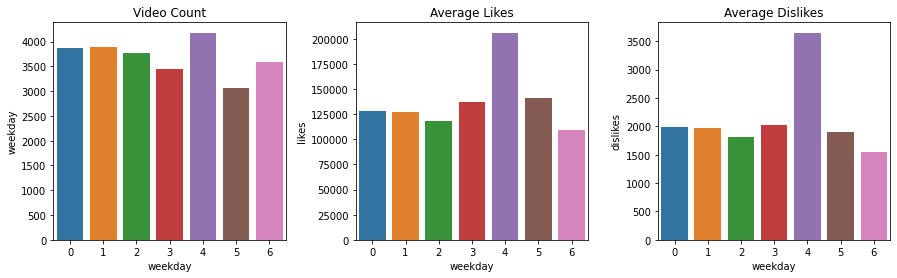

In [ ]:
#Checking Video counts and Avg likes Weekley by plotting them
tmp = df_fe_1.groupby('weekday').agg({'weekday':'count','likes':'mean','dislikes':'mean'}) 
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title ("Video Count")
sns.barplot(x=tmp.index, y= 'weekday', data=tmp)
plt.subplot(1,3,2)
plt.title ("Average Likes")
sns.barplot(x=tmp.index, y= 'likes', data=tmp)
plt.subplot(1,3,3)
plt.title ("Average Dislikes")
sns.barplot(x=tmp.index, y= 'dislikes', data=tmp)
plt.subplots_adjust(wspace=0.3)
plt.show()

In [ ]:
df_fe_1['publish_weekday'] = np.where(df_fe_1['weekday']==4,1,0)

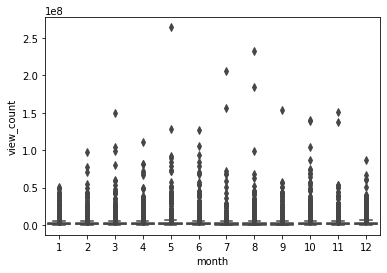

In [ ]:
sns.boxplot(x="month", y="view_count",data=df_fe_1)

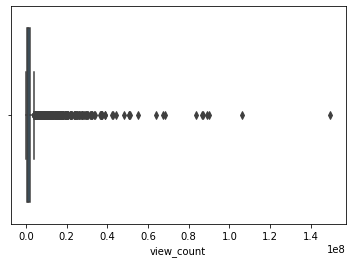

In [ ]:
channel_tmp = df_fe_1.groupby('channelId')['view_count'].agg('mean').reset_index()
sns.boxplot(x='view_count',data=channel_tmp)

In [ ]:
channel_views_median = round(channel_tmp[['view_count']].median(),2)
channel_views_median

view_count    883534.86
dtype: float64

In [ ]:
df_fe_1 = df_fe_1.merge(channel_tmp,on='channelId',how='left')
df_fe_1 = df_fe_1.rename(columns={'view_count_y':'channel_avg_views'})
df_fe_1['pop_channel'] = np.where(df_fe_1.channel_avg_views>=883534.86,1,0)

In [ ]:
# Create num_tag feature
df_fe_1['tag_words'] = df_fe_1.tags.str.split('|')
df_fe_1['num_tag'] = df_fe_1.tag_words.apply(len)
df_fe_1.head(1)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date_x,tags,view_count_x,likes,...,daytime,pop_daytime,pop_category,trend_in_20,weekday,publish_weekday,channel_avg_views,pop_channel,tag_words,num_tag
0,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-15 00:00:00+00:00,Migos|Avalanche|Quality|Control|Music/Motown|R...,6553613,258885,...,Afternoon,0,1,0,3,0,7.504470e+06,1,"[Migos, Avalanche, Quality, Control, Music/Mot...",8


In [ ]:
# Extract popular words in tags from popular videos
pop_video = df_fe_1[df_fe_1['view_count_x']>1500000]

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv = CountVectorizer()
x = cv.fit_transform(pop_video['tag_words'].astype(str))
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(x)

# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
# sort ascending 
df_idf.sort_values(by=['idf_weights'],ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
３dcg,9.586906
kinney,9.586906
veo,9.586906
kindess,9.586906
kinect,9.586906
...,...
funny,3.193315
new,3.128568
video,3.038687
the,2.792879


In [ ]:
count_vector=cv.transform(pop_video['tag_words'].astype(str)) 
# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)

feature_names = cv.get_feature_names() 
#get tfidf vector for first document 
first_document_vector=tf_idf_vector[0] 
#print the scores 
df_tags = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df_tags.sort_values(by=["tfidf"],ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
avalanche,0.470393
motown,0.416039
migos,0.383082
control,0.365261
quality,0.341875
...,...
gaurdiola,0.000000
gauntlets,0.000000
gauntlet,0.000000
gatwa,0.000000


In [ ]:
df_tags = df_tags.sort_values(by=["tfidf"],ascending=False)
pop_tags = df_tags.iloc[:50].index
pop_tags

Index(['avalanche', 'motown', 'migos', 'control', 'quality', 'records', 'hop',
       'hip', 'music', 'quiéntecrees', 'quiz', 'quizzes', '00', 'quitting',
       'quo', 'quotes', 'quivers', 'quirk', 'quites', 'quit', 'qué', 'quintet',
       'quinta', 'quinones', 'quinoa', 'quinn', 'quimico', 'quiles', 'quiff',
       'qureshi', 'qwerty', 'quốc', 'rabbitholebd', 'racial', 'rachel',
       'races', 'racer', 'raced', 'race', 'raccoon', 'rabe', 'rabbits',
       'rabbithole', 'quiet', 'rabbit', 'rabbids', 'rabbert', 'ra', 'r6s',
       'r3hab'],
      dtype='object')

In [ ]:
pop_tags = ['avalanche', 'motown', 'migos', 'control', 'quality', 'records', 'hop',
       'hip', 'music', 'quiéntecrees', 'quiz', 'quizzes', '00', 'quitting',
       'quo', 'quotes', 'quivers', 'quirk', 'quites', 'quit', 'qué', 'quintet',
       'quinta', 'quinones', 'quinoa', 'quinn', 'quimico', 'quiles', 'quiff',
       'qureshi', 'qwerty', 'quốc', 'rabbitholebd', 'racial', 'rachel',
       'races', 'racer', 'raced', 'race', 'raccoon', 'rabe', 'rabbits',
       'rabbithole', 'quiet', 'rabbit', 'rabbids', 'rabbert', 'ra', 'r6s',
       'r3hab']

In [ ]:
df_fe_1['if_pop_tags'] = df_fe_1['tag_words'].apply(lambda x: len(list(set(x).intersection(pop_tags))))
df_fe_1['description_length'] = df_fe_1.description.apply(len)


In [ ]:
df_fe_1 = df_fe_1.rename(columns={'view_count_x':'view_count'})
corr_temp = df_fe_1[['view_count','title_length','pop_category','pop_daytime','trend_in_20','publish_weekday','comments_disabled','pop_channel','num_tag','if_pop_tags','description_length']]
corr_temp.corr().style.background_gradient(cmap='coolwarm')

,view_count,title_length,pop_category,pop_daytime,trend_in_20,publish_weekday,comments_disabled,pop_channel,num_tag,if_pop_tags,description_length
view_count,1.000000,-0.066833,0.143462,0.077756,0.100674,0.073782,-0.002698,0.220037,-0.001926,-0.002903,0.048552
title_length,-0.066833,1.000000,-0.018305,0.099022,-0.018746,-0.012680,0.037215,-0.077442,0.158796,-0.006965,0.130822
pop_category,0.143462,-0.018305,1.000000,0.068685,0.013315,0.162392,-0.031530,0.137759,0.034811,0.088752,0.088371
pop_daytime,0.077756,0.099022,0.068685,1.000000,0.065384,0.113265,0.013716,0.014710,-0.005842,0.021750,-0.052982
trend_in_20,0.100674,-0.018746,0.013315,0.065384,1.000000,-0.031120,0.022518,0.072478,0.028515,0.009443,0.000227
publish_weekday,0.073782,-0.012680,0.162392,0.113265,-0.031120,1.000000,-0.016122,0.073818,0.017293,0.017980,0.055735
comments_disabled,-0.002698,0.037215,-0.031530,0.013716,0.022518,-0.016122,1.000000,-0.008668,-0.003863,0.012374,-0.017813
pop_channel,0.220037,-0.077442,0.137759,0.014710,0.072478,0.073818,-0.008668,1.000000,0.010327,-0.017120,0.018376
num_tag,-0.001926,0.158796,0.034811,-0.005842,0.028515,0.017293,-0.003863,0.010327,1.000000,0.149649,0.244231
if_pop_tags,-0.002903,-0.006965,0.088752,0.021750,0.009443,0.017980,0.012374,-0.017120,0.149649,1.000000,0.043582


## Modeling

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from sklearn.model_selection import TimeSeriesSplit

In [ ]:
df_fe_1.head(1)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date_x,tags,view_count,likes,...,pop_category,trend_in_20,weekday,publish_weekday,channel_avg_views,pop_channel,tag_words,num_tag,if_pop_tags,description_length
0,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-15 00:00:00+00:00,Migos|Avalanche|Quality|Control|Music/Motown|R...,6553613,258885,...,1,0,3,0,7.504470e+06,1,"[Migos, Avalanche, Quality, Control, Music/Mot...",8,0,4653


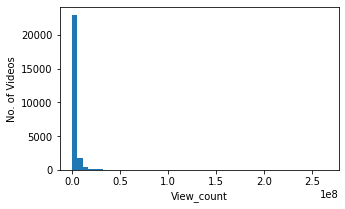

In [ ]:
# Creating histogram
fig, axs = plt.subplots(1,1,figsize =(5, 3))
axs.hist(df_fe_1.view_count, bins = 50)
plt.xlabel('View_count')
plt.ylabel('No. of Videos')
# Show plot
plt.show()

In [ ]:
df_fe_1['view_range'] = pd.cut(df_fe_1['view_count'], bins=[-1, 750000, 1750000, float('Inf')], labels=['0-0.75M', '0.75-1.75M', '>1.75M'])

In [ ]:
train = df_fe_1[(df_fe_1['year']==2020)|(df_fe_1['year']==2021)| ((df_fe_1['year']==2022) & (df_fe_1['month'].isin([1,2,3,4])))].sort_values('publishedAt')
test = df_fe_1[(df_fe_1['year']==2022) & (df_fe_1['month'].isin([5,6,7]))].sort_values('publishedAt')
print(train.shape, test.shape)

(22611, 36) (3192, 36)


In [ ]:
train_index = list(train.index)
test_index = list(test.index)

## KNN 

In [ ]:
X = train[['channel_avg_views','title_length','num_tag']]
y = train['view_range']
test_X = test[['channel_avg_views','title_length','num_tag']]
test_y = test['view_range']

In [ ]:
## Time-based Cross Validation
tscv = TimeSeriesSplit(n_splits=4, test_size=2000)
scores = []
for t_index, val_index in tscv.split(train_index):
  data_train = X.iloc[t_index]
  target_train = y.iloc[t_index]
  data_val = X.iloc[val_index]
  target_val = y.iloc[val_index]
  
  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(data_train, target_train)
  preds = knn.predict(data_val)

  # accuracy for the current fold only    
  knnscore = accuracy_score(target_val,preds)
  scores.append(knnscore)

print('Cross Validation score:', scores, '\n', 'Average Score:', np.mean(scores))

Cross Validation score: [0.6585, 0.6645, 0.659, 0.67] 
 Average Score: 0.663


In [ ]:
# Model and test on test data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred = knn.predict(test_X)
cm = confusion_matrix(test_y,y_pred)
report = classification_report(test_y,y_pred)
print(report,cm)

              precision    recall  f1-score   support

     0-0.75M       0.76      0.77      0.76      1317
  0.75-1.75M       0.52      0.49      0.50       886
      >1.75M       0.73      0.75      0.74       989

    accuracy                           0.69      3192
   macro avg       0.67      0.67      0.67      3192
weighted avg       0.68      0.69      0.68      3192
 [[1013  237   67]
 [ 247  435  204]
 [  77  171  741]]


Text(33.0, 0.5, 'True Labels')

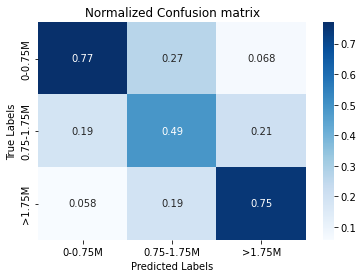

In [ ]:
# Normalize confusion matrix
sums = np.sum(cm, axis=1)
normalized_cm = cm / sums

plt.clf()
labels = ['0-0.75M', '0.75-1.75M', '>1.75M']
sns.heatmap(normalized_cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Normalized Confusion matrix')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

## RF

In [ ]:
X = train[['pop_category','pop_daytime','trend_in_20','channel_avg_views','publish_weekday','title_length','comments_disabled','num_tag','if_pop_tags','description_length']]
test_X = test[['pop_category','pop_daytime','trend_in_20','channel_avg_views','publish_weekday','title_length','comments_disabled','num_tag','if_pop_tags','description_length']]

In [ ]:
## Time-based Cross Validation
tscv = TimeSeriesSplit(n_splits=4, test_size=2000)
scores = []
for t_index, val_index in tscv.split(train_index):
  data_train = X.iloc[t_index]
  target_train = y.iloc[t_index]
  data_val = X.iloc[val_index]
  target_val = y.iloc[val_index]
  
  rf = RandomForestClassifier(n_estimators=75,max_features=3,oob_score=True)
  rf.fit(data_train, target_train)
  preds = rf.predict(data_val)

  # accuracy for the current fold only    
  rfscore = accuracy_score(target_val,preds)
  scores.append(rfscore)

print('Cross Validation score:', scores, '\n', 'Average Score:', np.mean(scores))

Cross Validation score: [0.6825, 0.693, 0.714, 0.707] 
 Average Score: 0.699125


In [ ]:
rf = RandomForestClassifier(n_estimators=75,max_features=3,oob_score=True)
rf.fit(X, y)
y_pred = rf.predict(test_X)
cm = confusion_matrix(test_y,y_pred)
report = classification_report(test_y,y_pred)
print(report)

              precision    recall  f1-score   support

     0-0.75M       0.84      0.75      0.79      1317
  0.75-1.75M       0.56      0.57      0.56       886
      >1.75M       0.74      0.84      0.79       989

    accuracy                           0.73      3192
   macro avg       0.71      0.72      0.71      3192
weighted avg       0.73      0.73      0.73      3192



Text(33.0, 0.5, 'True Labels')

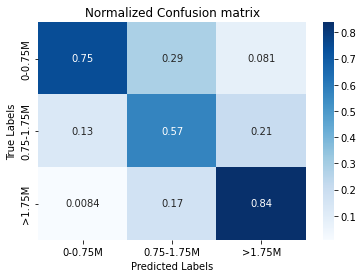

In [ ]:
# Normalize confusion matrix
sums = np.sum(cm, axis=1)
normalized_cm = cm / sums

plt.clf()
labels = ['0-0.75M', '0.75-1.75M', '>1.75M']
sns.heatmap(normalized_cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Normalized Confusion matrix')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

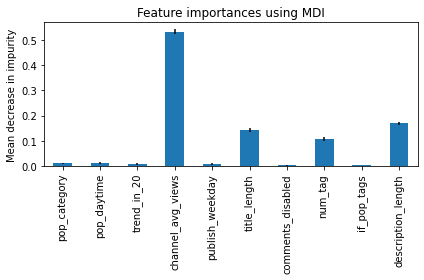

In [ ]:
# Plot Feature Importance
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=['pop_category','pop_daytime','trend_in_20','channel_avg_views','publish_weekday','title_length','comments_disabled','num_tag','if_pop_tags','description_length'])
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## XGBoost

In [ ]:
## Time-based Cross Validation
tscv = TimeSeriesSplit(n_splits=4, test_size=2000)
scores = []
for t_index, val_index in tscv.split(train_index):
  data_train = X.iloc[t_index]
  target_train = y.iloc[t_index]
  data_val = X.iloc[val_index]
  target_val = y.iloc[val_index]
  
  xgb_mdl = xgb.XGBClassifier()
  xgb_mdl.fit(data_train, target_train)
  preds = xgb_mdl.predict(data_val)

  # accuracy for the current fold only    
  xgbscore = accuracy_score(target_val,preds)
  scores.append(xgbscore)

print('Cross Validation score:', scores, '\n', 'Average Score:', np.mean(scores))

Cross Validation score: [0.715, 0.7195, 0.7205, 0.726] 
 Average Score: 0.72025


In [ ]:
xgb_mdl = xgb.XGBClassifier()
xgb_mdl.fit(X,y)
y_pred = xgb_mdl.predict(test_X)
cm = confusion_matrix(test_y,y_pred)
report = classification_report(test_y,y_pred)
print(report)


              precision    recall  f1-score   support

     0-0.75M       0.91      0.68      0.78      1317
  0.75-1.75M       0.56      0.66      0.60       886
      >1.75M       0.75      0.87      0.80       989

    accuracy                           0.73      3192
   macro avg       0.74      0.74      0.73      3192
weighted avg       0.76      0.73      0.74      3192



Text(33.0, 0.5, 'True Labels')

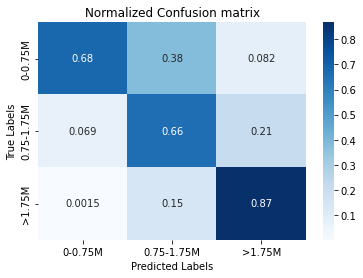

In [ ]:
# Normalize confusion matrix
sums = np.sum(cm, axis=1)
normalized_cm = cm / sums

plt.clf()
labels = ['0-0.75M', '0.75-1.75M', '>1.75M']
sns.heatmap(normalized_cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Normalized Confusion matrix')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

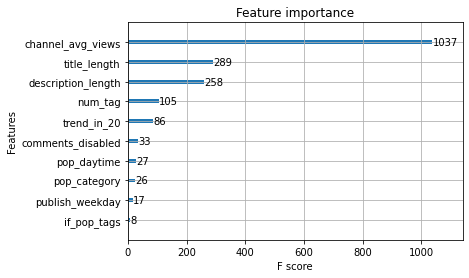

In [ ]:
from xgboost import plot_importance

plot_importance(xgb_mdl)
plt.show()